In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# descriptive anlysis and basic EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
# cehcking for null values
df.isna().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [5]:
# checking for duplicated values
df[df.duplicated]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [6]:
df.shape

(600, 6)

In [7]:
df.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [8]:
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [9]:
df['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

<Axes: xlabel='Marital.Status', ylabel='count'>

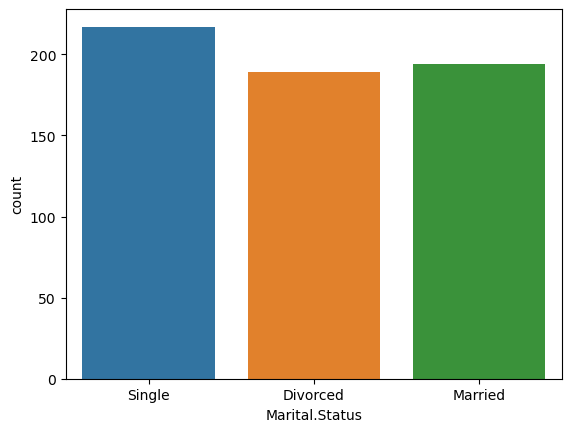

In [10]:
sns.countplot(df,x='Marital.Status')

<Axes: xlabel='Undergrad', ylabel='count'>

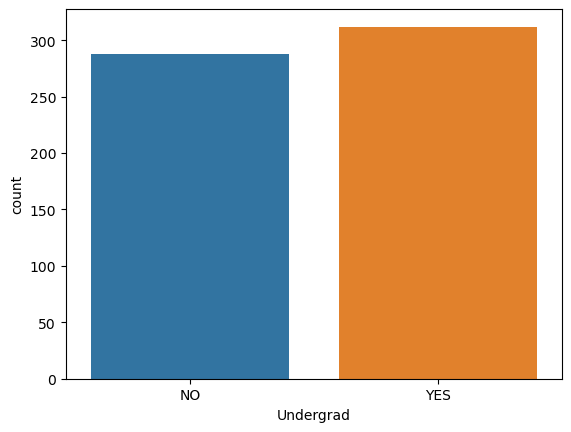

In [11]:
sns.countplot(df,x='Undergrad')

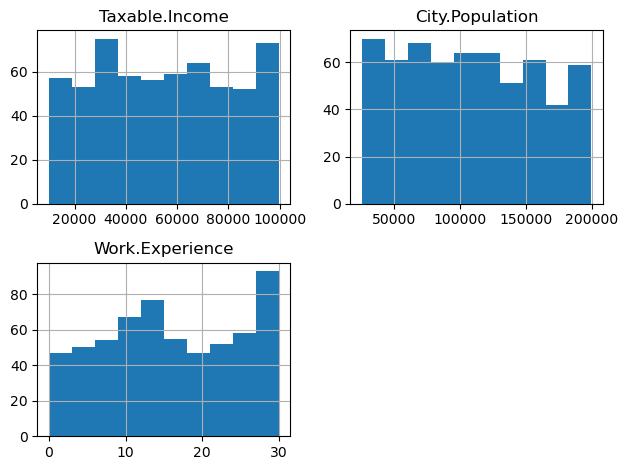

In [12]:
df.hist()
plt.tight_layout()

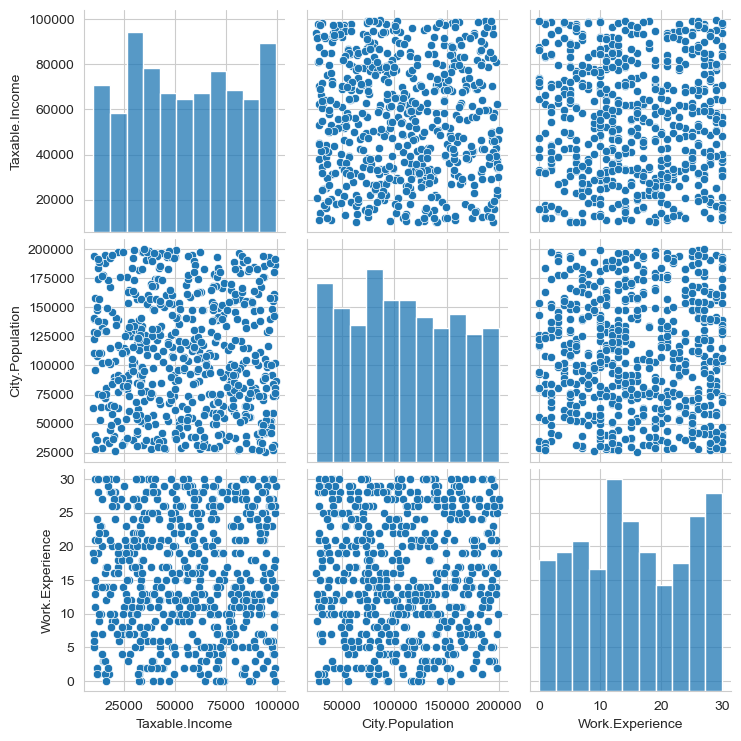

In [54]:
sns.set_style(style='whitegrid')
sns.pairplot(df)

<Axes: >

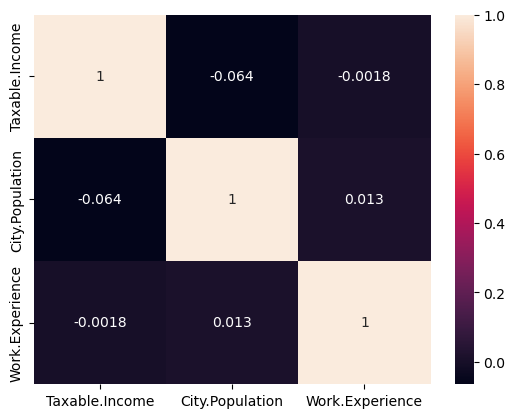

In [13]:
# correlation analysis
sns.heatmap(df.corr(),annot=True)

In [14]:
taxable=[]

for v in df['Taxable.Income']:
    if v<=30000:
        taxable.append('risky')
    else:
        taxable.append('good')

In [15]:
df['taxable']=taxable

In [16]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [17]:
fraud=df.drop(['Taxable.Income','City.Population'],axis=1)
fraud

,Undergrad,Marital.Status,Work.Experience,Urban,taxable
0,NO,Single,10,YES,good
1,YES,Divorced,18,YES,good
2,NO,Married,30,YES,good
3,YES,Single,15,YES,good
4,NO,Married,28,NO,good
...,...,...,...,...,...
595,YES,Divorced,7,YES,good
596,YES,Divorced,2,YES,good
597,NO,Divorced,0,YES,good
598,YES,Married,17,NO,good


In [18]:
# feature scaling
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
fraud['Undergrad']=le.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=le.fit_transform(fraud['Marital.Status'])
fraud['Urban']=le.fit_transform(fraud['Urban'])

In [21]:
fraud

,Undergrad,Marital.Status,Work.Experience,Urban,taxable
0,0,2,10,1,good
1,1,0,18,1,good
2,0,1,30,1,good
3,1,2,15,1,good
4,0,1,28,0,good
...,...,...,...,...,...
595,1,0,7,1,good
596,1,0,2,1,good
597,0,0,0,1,good
598,1,1,17,0,good


In [22]:
x=fraud.iloc[:,:-1]
y=fraud[['taxable']]

In [23]:
# train test split
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=45)

In [25]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(420, 4)
(180, 4)
(420, 1)
(180, 1)


# Random Forest Algorithm

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model1=RandomForestClassifier(n_estimators=100,max_features=3)

In [38]:
model1.fit(xtrain,ytrain)

RandomForestClassifier(max_features=3)

In [39]:
ypred=model1.predict(xtest)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
# accuarcy
accuracy_score(ytest,ypred)*100

71.11111111111111

# Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree=DecisionTreeClassifier()

In [34]:
model2=BaggingClassifier(base_estimator=tree,n_estimators=100,random_state=10)

In [35]:
model2.fit(xtrain,ytrain)
ypred1=model2.predict(xtest)

In [36]:
accuracy_score(ytest,ypred)*100

70.0

# Boosting

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
model3=AdaBoostClassifier(n_estimators=100,random_state=9)

In [44]:
model3.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=100, random_state=9)

In [46]:
ypred2=model3.predict(xtest)

In [48]:
# accuracy
accuracy_score(ytest,ypred2)*100

82.22222222222221

# Stacking

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [50]:
estimators=[]

model4=LogisticRegression()
estimators.append(('logistic',model4))
model5=SVC()
estimators.append(('svm',model5))
model6=DecisionTreeClassifier()
estimators.append(('tree',model6))

In [51]:
final_model=VotingClassifier(estimators=estimators)

In [52]:
final_model.fit(xtrain,ytrain)
prediction=final_model.predict(xtest)

In [53]:
# accuracy
accuracy_score(ytest,prediction)*100

82.22222222222221

In [ ]:
# Boosting and Stacking techinique has maximum accuracy:82.2%